# Problem Statement :
A set of reasonably clean records from 1994 Census bureau database was extracted using the following conditions :((AAGE>16) && (AGI>100) &&(AFNLWGT>1) && (HRSWK>0)).The aim is to predcit whether a person makes over $50k a Year.

# Importing Necessary Libraries 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

# Loading Dataset & Creating New Dataframe

In [63]:
census = pd.read_csv('Census.csv')

In [64]:
df = pd.DataFrame(census)
df.head(12)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


- New dataframe for easy analysis.
- The datset has objects & Int Input variables.
- Income is a binary class target variable.

In [65]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- dataframe columns display correct column name.
- Column name doesnt have any spaces & special characters.

In [66]:
df.shape

(32560, 15)

- dataset has 32560 rows & 15 Columns

In [67]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- Datasets has both integer & objects datatypes.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- datasets has 6 integer columns & 9 objects columns.
- Index 0 is Age Col & Index 14 is Income col.

In [69]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

- The above commmand only displays the columns having only numeric values
- Cat col is not displayed as those values are non numeric.
- Capital_gain & Capital_loss shows hughe positive skewness.
- The positive skewness will get reduced after missing value treatment & removing outliers.

In [70]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

- The Income col is a target variable or dependent variable.
- The target col is binary class with having string charracter.
- The No of person having salary less then 50k is more which is 24719.
- where the person having salary greater then 50 is 7841.
- The target col is not balanced and the same will be balanced later with upsampling method.

<AxesSubplot:xlabel='Income', ylabel='count'>

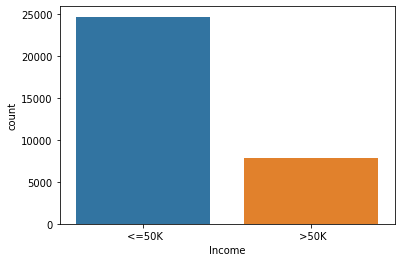

In [71]:
sns.countplot(df['Income'])

- The count of person having salary less then 50k is more.
- There is hughe diff in count between two class of salary.

In [72]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There is no NaN value seen in dataset.
- But the Capital_gain & Capital_loss has hughe 0 values which will be treated later.
- Also Workplace, Occupation & Native_Country Col has special character (?) present in these cols whose value is also high.
- The Special Character present in these col will also be treated later.

#### Dividing Dataframe into numeric & object dataframe for easy EDA and Labelencoding.

In [73]:
numerics = ['float64', 'int64']
numeric = df.select_dtypes(include=numerics)
objects = df.select_dtypes(exclude=numerics)

- The datasets has both numeric & Object Col.
- The datasets is divided into numeric & object datfarme for easy EDA.

In [74]:
objects.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


- Objects dataframe displays all object/cat variables.
- Target Col is also a object data type.

In [75]:
objects.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


- Target Col has two class which is <=50k & >50k.
- Where the count of <=50k salary is highest which is 24719.
- Country Col has 42 class where Country United states freq is highest with count value of 29169.
- Similary kind of Obs Can be seen with remaining Objects variables.

# Countplot for all Object variables.

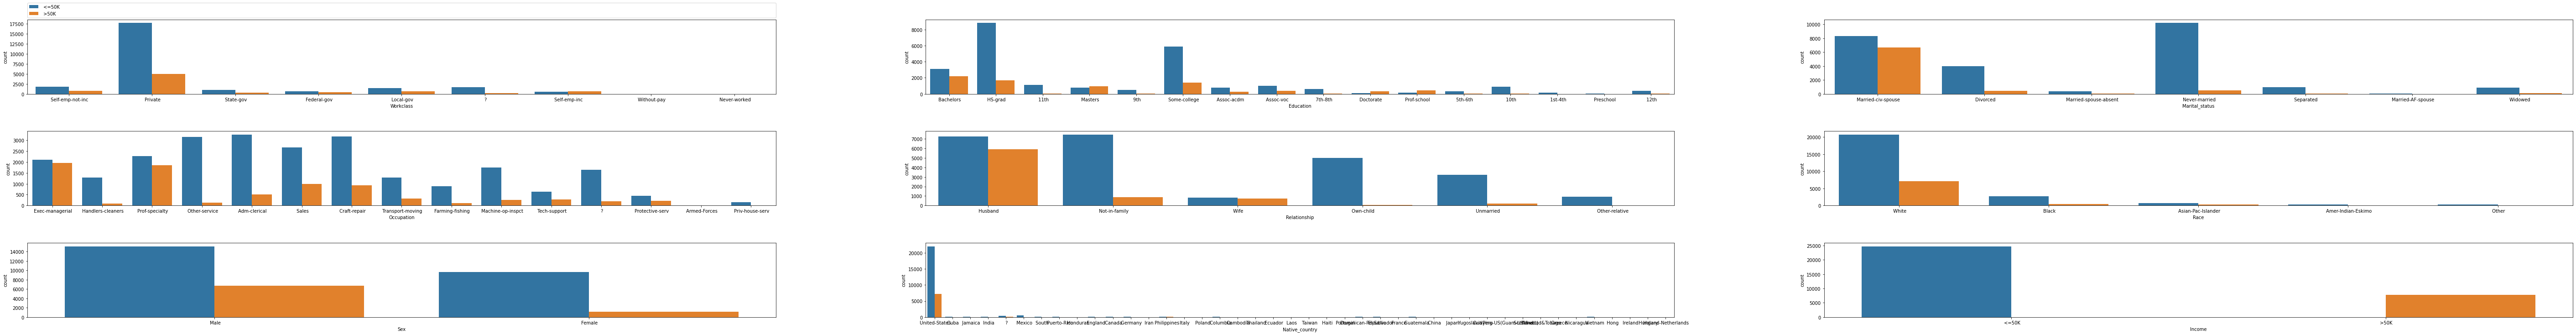

In [76]:
fig,ax =plt.subplots(3,3,figsize=(100,12))
fig.subplots_adjust(hspace=.5)
for i in range(0,9):
    g = sns.countplot(x=objects.iloc[:,i], hue=objects["Income"], ax=ax[divmod(i,3)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()

- Worlclass Col has 9 class with private class has highest count where most of the person from this class having salary  <=50k 
- Education col has 16 class with HS-grad class is having highest count most of the person from this class having salary  <=50k 
- Marital_status has 7 class with Married-civ-spouse class freq is highest, but most admin-clerk class having salary <=50k.
- Occupation col has 15 class where Prof-speciality tops the freq.
- Relationship Col has 6 unique class where husband class is the highest.
- Race has 5 class where White class is the highest.
- Sex has two class Male & Female where male class is the highest also most of the person from male class has salry <=50k
- Native Country has 42 class where Country United states has highest count.
- Similar kind of Obs Can be drwan for remaing variables.

In [80]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

- In above col Special Char ? has count of 583.
- These will be converted into value 0 with the help of label encoder.
- After which 0 value will converted to NaN to remove this from the dataset as this has no significance in the dataset.

In [81]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

- In above col Special Char ? has count of 1843.
- These will be converted into value 0 with the help of label encoder.
- After which 0 value will converted to NaN to remove this from the dataset as this has no significance in the dataset.

In [82]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- In above col Special Char ? has count of 1836.
- These will be converted into value 0 with the help of label encoder.
- After which 0 value will converted to NaN to remove this from the dataset as this has no significance in the dataset.

<AxesSubplot:xlabel='Native_country', ylabel='count'>

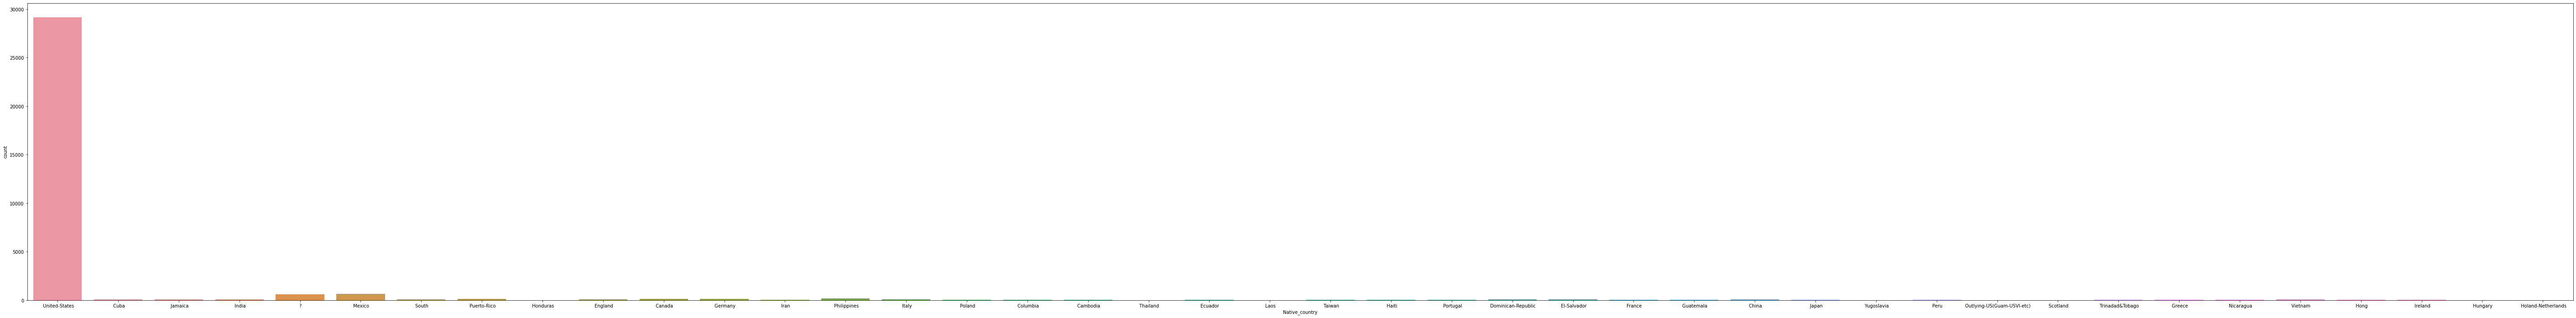

In [83]:
fig,ax =plt.subplots(figsize=(100,12))
sns.countplot(df['Native_country'])

- in Above plot United States Class freq is the highest among rest others in this col.

# Labelencoder

In [84]:
# categorical variable encoding
cat_vars_list = objects.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- All objects col is label encoded  for further EDA treatment and applying ML Algo.

In [85]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0.0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0.0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0.0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0.0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0.0,0,40,39,0


- The dataframe shows encoded value for objects cols.

# Detecting Encoded 0 values after label encoding for special char

In [86]:
df['Native_country'].value_counts()

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
12       29
10       29
7        28
21       24
17       20
1        19
38       19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: Native_country, dtype: int64

?-str char converted to 0 whose value = 583 for Native_country col

In [87]:
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

?-str char converted to 0 whose value = 1836 for  Workclass col

In [88]:
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

?-str char converted to 0 whose value = 1843 for Occupation col

# Missing Value treatment

In [89]:
df['Native_country'] = df['Native_country'].replace(0,np.nan)
df['Workclass'] = df['Workclass'].replace(0,np.nan)
df['Occupation'] = df['Occupation'].replace(0,np.nan)
df['Capital_gain'] = df['Capital_gain'].replace(0,np.nan)
df['Capital_loss'] = df['Capital_loss'].replace(0,np.nan)

- the capital_gain & capital_loss col has hughe 0 values which is replaced by nan value.
- Also all the special char which got converted to 0 value is replaced by NaN to remove from the dataset.
- All the converted nan value will be removed from the col.

In [90]:
df.isnull().sum()

Age                   0
Workclass          1836
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country      583
Income                0
dtype: int64

- Now the 0 converted NaN values is very high in capital_gain & capital_loss.
- also the converted nan value is also high in workclass, occupation & also seen in Native country.
- As the NaN value is capital_gain & capital_loss is hughe so therefore these two col will be dropped later from the dataframe.

In [91]:
df['Capital_gain'].skew()

1.1451887533111862

- Capital_gain shows high posi tive skewness.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

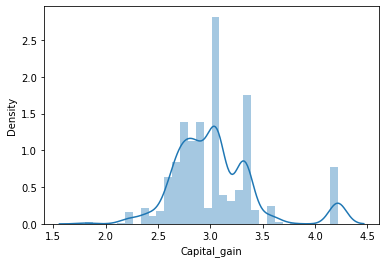

In [92]:
sns.distplot(df['Capital_gain'])

-  The data is not normal in capital_gain col as most of the value is NaN value.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

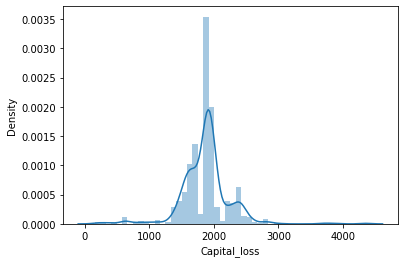

In [93]:
sns.distplot(df['Capital_loss'])

- Capital_loss does not show skewness in data, but distribution is not noraml.

In [94]:
df['Capital_loss'].skew()

0.37101800361787624

- No skewness seen in Capital_loss col

In [95]:
df['Native_country'].fillna(df['Native_country'].value_counts().idxmax(),inplace=True)
df['Workclass'].fillna(df['Workclass'].value_counts().idxmax(),inplace=True)
df['Occupation'].fillna(df['Occupation'].value_counts().idxmax(),inplace=True)
df['Capital_gain'] = df['Capital_gain'].fillna(df['Capital_gain'].mean())
df['Capital_loss'] = df['Capital_loss'].fillna (df['Capital_loss'].median())

- As Native_Country, Workclass & Occupation are cat variable, hence missing value is replaced by value_counts.
- Capital_gain shows some noraml distribution missing value is replaced by mean.
- Capital_loss shows doesnt show distribution missing value is replaced by median.

In [96]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- All the missing value is treated in the dataset.

# Pairplot

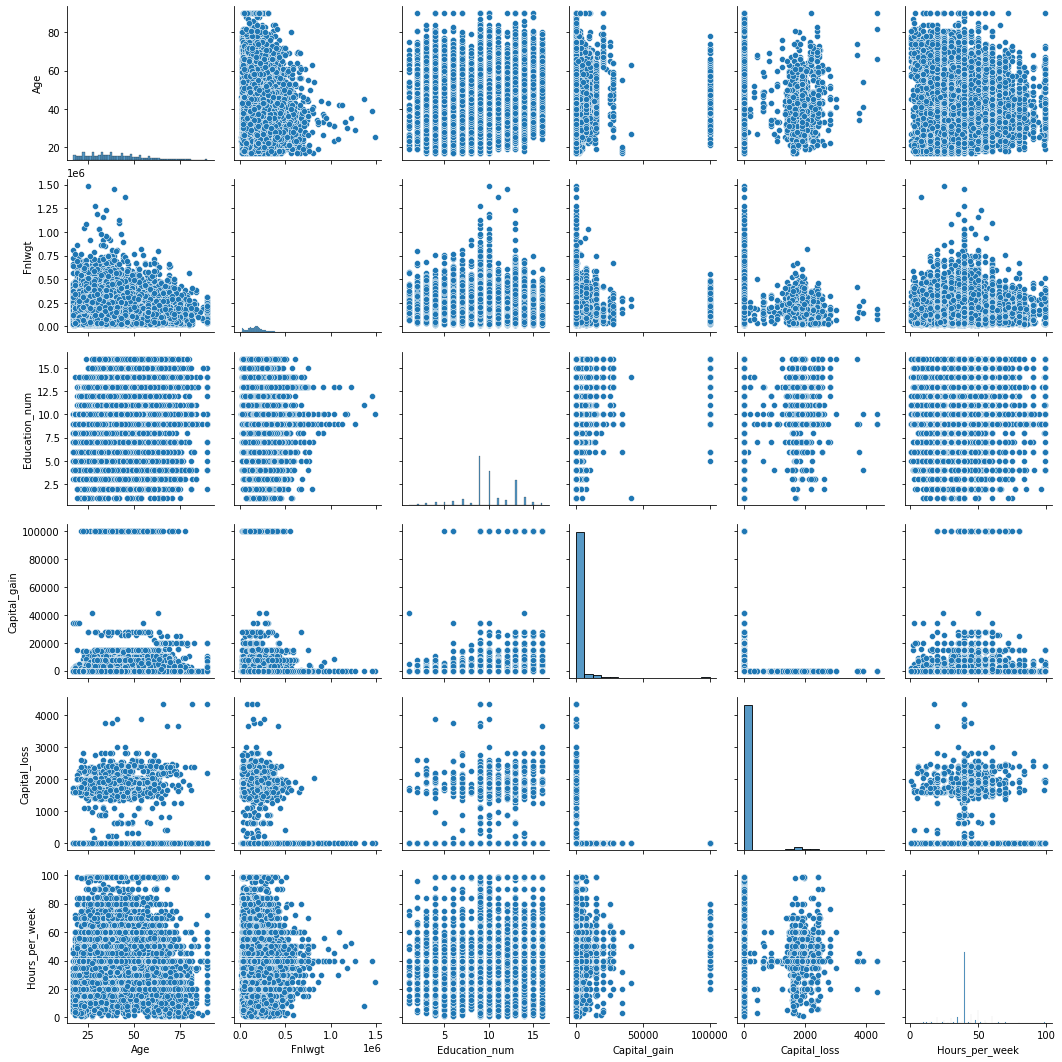

In [97]:
sns.pairplot(numeric)

- As we can see the data is not normal with each variables.
- the data is also not linear with each other.

# Boxplot for outliers detection

<AxesSubplot:>

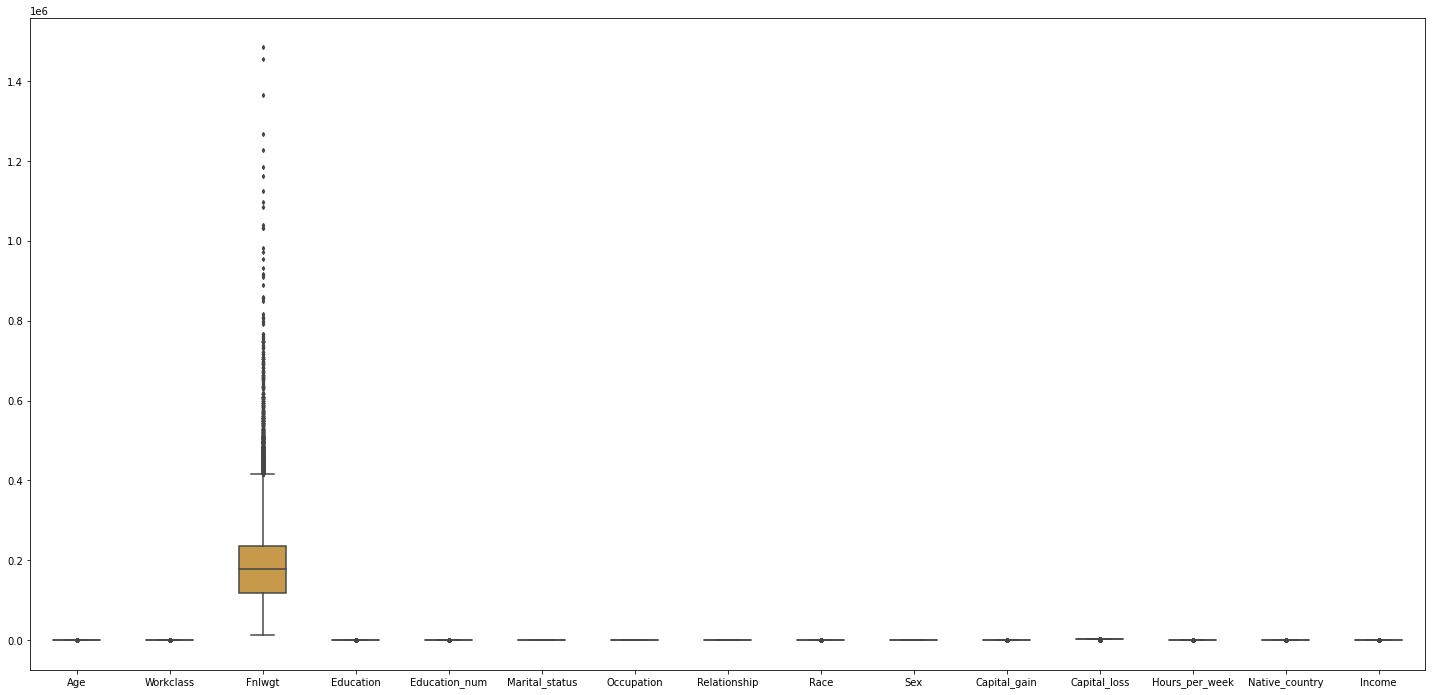

In [98]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- Only one col Fnlwgt show the presence of outliers which is hughe.

# Correlation

In [99]:
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,3.949784e-02,3.894965e-02,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,2.868682e-02,1.917551e-02,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,3.249185e-03,-6.842331e-03,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,3.108674e-02,2.322905e-03,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,1.183237e-01,2.221000e-02,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-3.244952e-02,7.726410e-03,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,1.557812e-02,2.740254e-05,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-4.341541e-02,-2.843780e-02,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,4.524068e-03,5.013947e-03,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,3.664760e-02,2.360459e-02,0.229312,0.002055,0.215995


- Age shows -ve corr with relationship
- Age shows some corr with Target Col
- Target Col-Income shows some corr with Hours_per_week, education_num 7 age.
- Target col-Income shows -ve corr with Relationship & Marital_status.
- Education_num shows some corr with education col.

# Heatmap

<AxesSubplot:>

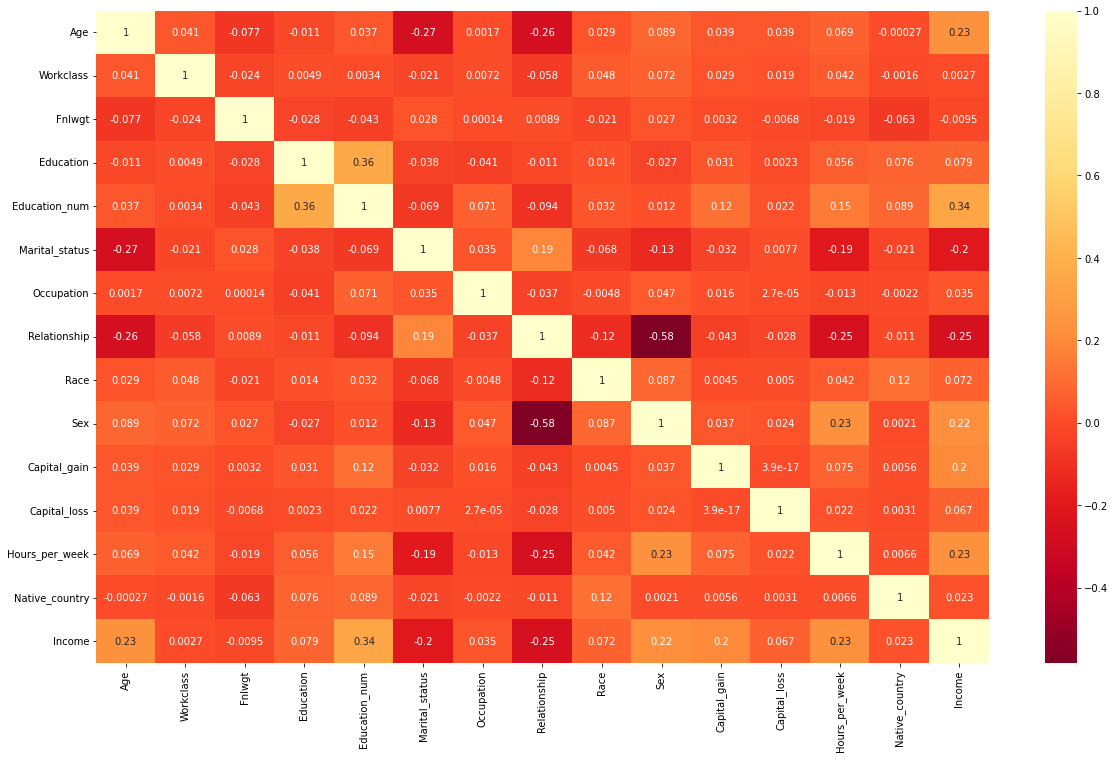

In [100]:
plt.figure(figsize=(20,12))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Age shows -ve corr with relationship
- Age shows some corr with Target Col
- Target Col-Income shows some corr with Hours_per_week, education_num 7 age.
- Target col-Income shows -ve corr with Relationship & Marital_status.
- Education_num shows some corr with education col.

# VIF for multicollinearity.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [103]:
vif_calc()

    VIF Factor        features
0    10.588580             Age
1    14.793770       Workclass
2     4.271682          Fnlwgt
3     9.366343       Education
4    21.648294   Education_num
5     4.542633  Marital_status
6     4.287567      Occupation
7     3.022924    Relationship
8    20.075408            Race
9     4.752500             Sex
10  344.999887    Capital_gain
11  324.406282    Capital_loss
12   13.337106  Hours_per_week
13   39.336041  Native_country
14    1.691090          Income


- The capital_gain & capital_loss shows too high value.
- as the percentage of missing value is very high in these col, hence it is dropped below.

In [104]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [106]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,83311,9,13,2,4.0,0,4,1,13,39.0,0
1,38,4.0,215646,11,9,0,6.0,1,4,1,40,39.0,0
2,53,4.0,234721,1,7,2,6.0,0,2,1,40,39.0,0
3,28,4.0,338409,9,13,2,10.0,5,2,0,40,5.0,0
4,37,4.0,284582,12,14,2,4.0,5,4,0,40,39.0,0


- the two dropped col is not seen in dataframe.

# Removing Outliers

In [107]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  8, ...,  8,  8,  8], dtype=int64))


- detecting outliers in the dataframe.

In [108]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (29296, 13)


- removing the outliers whose value not falling under 3std and greated then 3 std.

In [109]:
Data_loss=((32560-29296)/32560)*100

-  Computing the percentage data loss after removing outliers from the dataset.

In [110]:
Data_loss

10.024570024570025

- The data loss is 10% after removing outliers from the dataset.
- The dataset might contain still contain outliers.
- But I am not removing residual outliers from the dataset as those outliers will be averaged out by tree based ML algo.

# Skewness Treatment

In [111]:
numeric.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

- the capital_gain & capital_loss col shows hughe +ve Skewness.
- this is because the presence of hughe missing value.

In [112]:
df.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

- As the capital_gain & capital_loss col got dropped because missing value was too high.
- Most of the remianing col is categorical so treating skewness will be of no use.
- Fnlwgt shows some +ve Skewness.

# Histogram plot

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

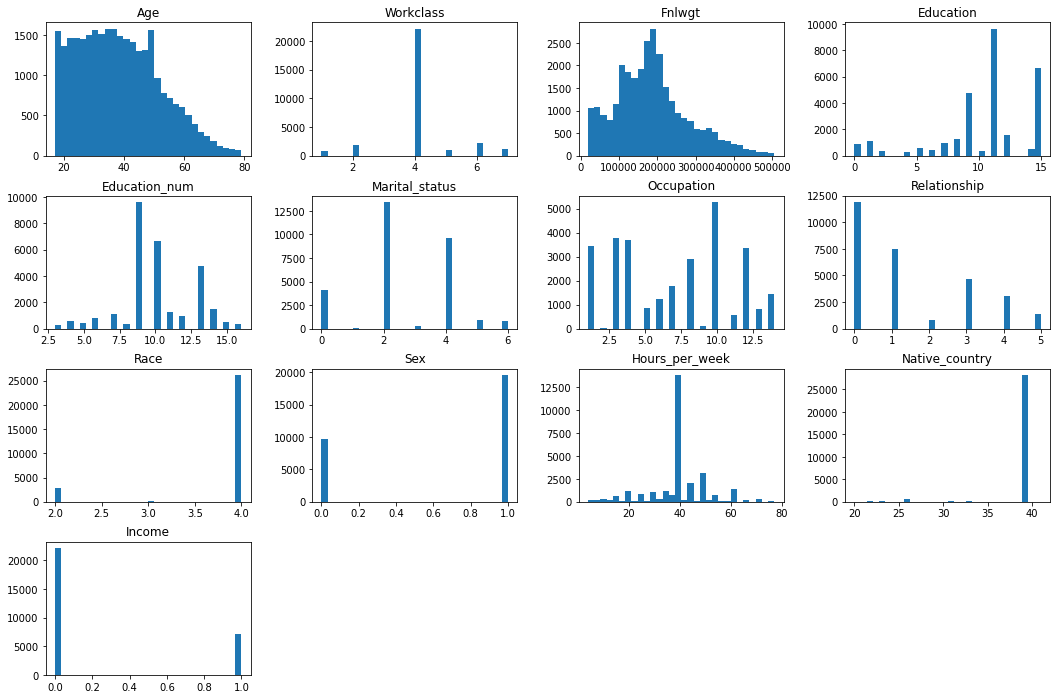

In [113]:
df.hist(grid=False, figsize=(18,12), bins=30)

- As the capital_gain & capital_loss col got dropped because missing value was too high.
- Most of the remianing col is categorical so treating skewness will be of no use.
- Fnlwgt shows some +ve Skewness.

# Disstplot

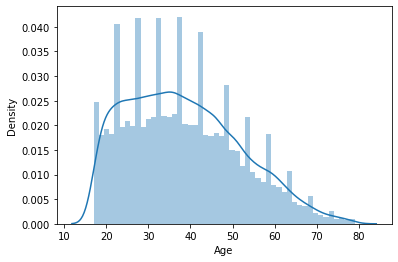

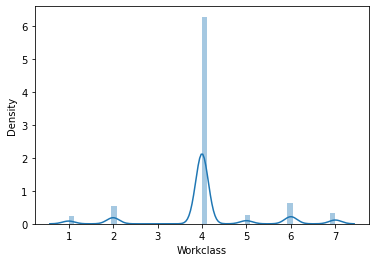

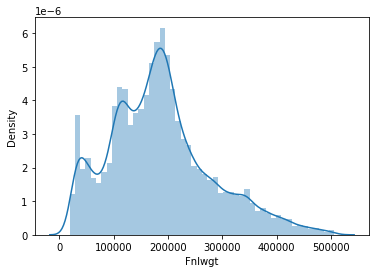

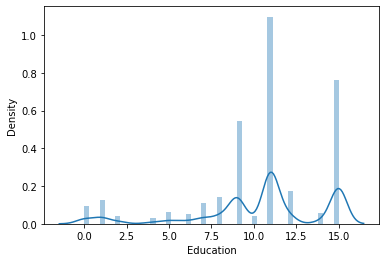

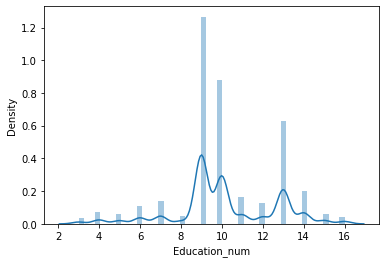

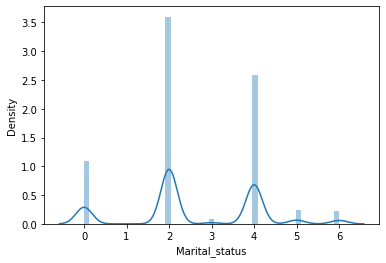

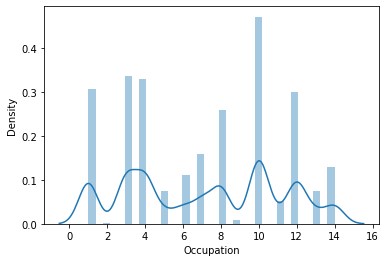

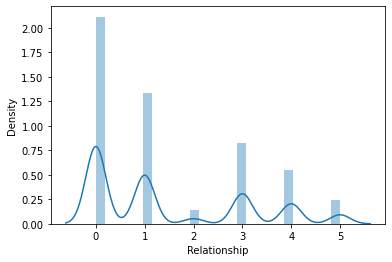

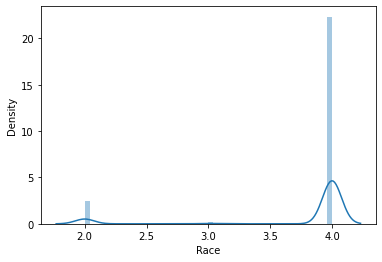

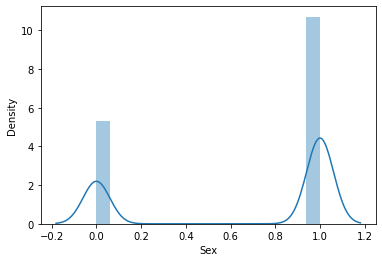

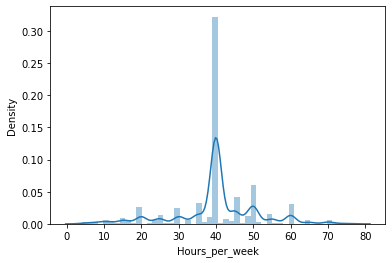

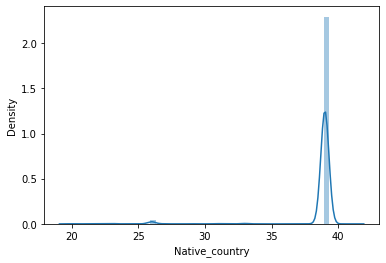

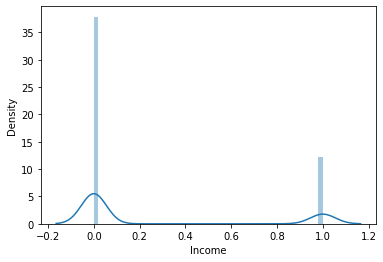

In [114]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- As the capital_gain & capital_loss col got dropped because missing value was too high.
- Most of the remianing col is categorical so treating skewness will be of no use.
- Fnlwgt shows some +ve Skewness.
- Age col is not normaly distributed.

# Dividing dataframe into Independent & Target Column

In [115]:
x=df.drop("Income",axis=1)
y=df["Income"]

- The dataset is divided into independent & Target Variable.
- x dataframe contain all independent variables.
- y is the target col Income.

In [116]:
x.shape

(29296, 12)

- Indepndent variables shows 29296 obs & 12 col

In [117]:
y.shape

(29296,)

- y the target col has 29296 obs.

# Class Imbalance : Upsampling Target Col

In [119]:
df['Income'].value_counts()

0    22178
1     7118
Name: Income, dtype: int64

<=50K = 22178 & >=50K = 7118

In [120]:
from sklearn.utils import resample

In [121]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

In [ ]:
grtr = x[x.Income==0]
less = x[x.Income==1]

- The above code is already executed, but while commenting the cell accidentaly it got marked and the same is reversed to code cell.
- Hence the cell shows as not executed.

- created gretr & less instance of Income col.

In [123]:
# upsample minority
dia_upsampled = resample(less,
                          replace=True, # sample with replacement
                          n_samples=len(grtr),   # match number in majority
                          random_state=27)  # reproducible results

- Performing upsampling where lower value of income class will be balnaced with higher class value

In [125]:
upsampled = pd.concat([grtr, dia_upsampled])

- concating both class

In [127]:
upsampled.Income.value_counts()

1    22178
0    22178
Name: Income, dtype: int64

- Not both class of income is balanced equal.

In [128]:
upsampled.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,83311,9,13,2,4.0,0,4,1,13,39.0,0
1,38,4.0,215646,11,9,0,6.0,1,4,1,40,39.0,0
2,53,4.0,234721,1,7,2,6.0,0,2,1,40,39.0,0
4,37,4.0,284582,12,14,2,4.0,5,4,0,40,39.0,0
5,49,4.0,160187,6,5,3,8.0,1,2,0,16,23.0,0


- The upsampled frame now shows the target col equally balanced.

# Splitting upsampled dataframe into Independent & Target Variable

In [129]:
x=upsampled.drop("Income",axis=1)
y=upsampled["Income"]

- The upsampled dataframe is divided into independent & target variable.
- x is the independent variables & y is the target col

In [130]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,6.0,83311,9,13,2,4.0,0,4,1,13,39.0
1,38,4.0,215646,11,9,0,6.0,1,4,1,40,39.0
2,53,4.0,234721,1,7,2,6.0,0,2,1,40,39.0
4,37,4.0,284582,12,14,2,4.0,5,4,0,40,39.0
5,49,4.0,160187,6,5,3,8.0,1,2,0,16,23.0


In [133]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

In [131]:
x.shape

(44356, 12)

- x shows 44356 col & 12 col after upsampling where the number of obs got increased because of upsampling the target col.

In [132]:
y.shape

(44356,)

- y shows 44356 obs after upsampling where the number of obs got increased because of upsampling the target col.

# Scaling

In [135]:
from sklearn.preprocessing import StandardScaler # Importing standard scaler from sklearn preprocessing module.

In [136]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.76125334,  1.64498603, -1.09045376, ...,  0.60899427,
        -2.63378234,  0.16832249],
       [-0.18248889, -0.07968986,  0.32234614, ...,  0.60899427,
        -0.16099974,  0.16832249],
       [ 0.9971889 , -0.07968986,  0.52598961, ...,  0.60899427,
        -0.16099974,  0.16832249],
       ...,
       [ 1.23312446, -0.07968986, -1.01987515, ...,  0.60899427,
         0.29692296,  0.16832249],
       [-0.89029556,  0.78264809,  0.59762513, ...,  0.60899427,
        -0.61892244,  0.16832249],
       [-0.26113407,  2.50732397,  0.57603839, ...,  0.60899427,
         1.67069107,  0.16832249]])

- The data present in the dataframe is not scaled in same range hence the same is scaled with standard scaler.

In [137]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

88.87826205765815 at random_state 0
88.91241972947124 at random_state 1
89.24716491323952 at random_state 2
88.95340893564695 at random_state 3
87.75789042218882 at random_state 4
88.74846290476842 at random_state 5
88.62549528624129 at random_state 6
88.96024047000957 at random_state 7
88.75529443913102 at random_state 8
88.2839185681104 at random_state 9
88.63232682060391 at random_state 10
89.48626861593114 at random_state 11
88.63232682060391 at random_state 12
89.131028829075 at random_state 13
88.83044131711982 at random_state 14
88.8236097827572 at random_state 15
89.19251263833857 at random_state 16
88.17461401830852 at random_state 17
88.73479983604318 at random_state 18
89.17201803525072 at random_state 19
88.7416313704058 at random_state 20
88.53668533952725 at random_state 21
88.60500068315343 at random_state 22
88.50935920207678 at random_state 23
88.83727285148244 at random_state 24
88.55034840825249 at random_state 25
88.76895750785626 at random_state 26
88.7757890422188

- Decsiontree classifier is set for 200 random state in order to check the accu for each state & to select the best random state

In [138]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8990756744570527  on Random_state  76


-Obs : Above code is used to select best random sate out of 200 random state which is 76 with accuracy of 89%

# Splitting dataset in train & test

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 76)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 76

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


# Obs : Logistic Regression is giving 76% Accuracy

[0 1 1 ... 0 1 0]
0.7493048771323364
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      6569
           1       0.75      0.75      0.75      6738

    accuracy                           0.75     13307
   macro avg       0.75      0.75      0.75     13307
weighted avg       0.75      0.75      0.75     13307



- Obs: Logistic Reg Model acc is 75%%

# Decison tree Classifier

In [142]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.8987750807845495
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6569
           1       0.86      0.95      0.91      6738

    accuracy                           0.90     13307
   macro avg       0.90      0.90      0.90     13307
weighted avg       0.90      0.90      0.90     13307



- Obs: DTC Model acc is 90%

# Random Forest Classifier

In [143]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.9186894115878861
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      6569
           1       0.88      0.97      0.92      6738

    accuracy                           0.92     13307
   macro avg       0.92      0.92      0.92     13307
weighted avg       0.92      0.92      0.92     13307



- Obs: RFC Model acc is 92%

# Support Vector Classifier

In [144]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.8151348914105359
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      6569
           1       0.78      0.87      0.83      6738

    accuracy                           0.82     13307
   macro avg       0.82      0.81      0.81     13307
weighted avg       0.82      0.82      0.81     13307



- Obs: SVC Model acc is 82%

# KNN Classifier

In [145]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.8254302246937701
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6569
           1       0.79      0.89      0.84      6738

    accuracy                           0.83     13307
   macro avg       0.83      0.82      0.82     13307
weighted avg       0.83      0.83      0.82     13307



- Obs: Knn Model acc is 83%

# K-Fold Cross validation

In [146]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [147]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [148]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.745062708256272


In [149]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.9004643452251534


In [150]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.9182297964034947


In [151]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.8120434803468489


In [152]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.8291324559951022


# Best Model:

The difference between RFC acc & CV score is least among all above ML algo Model which is 0.18 (RFC acc - RFC CV score = 92 - 91.82)
, hence the best model i have selected is RFC.

# GridSearch CV & Hyperparameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [154]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

- Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [155]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [156]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

- Grid search CV applied to the Training Dataset 

In [157]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is 
- 'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': '100'

# Best Model Selected is Random Forest Classifier

In [158]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.44532952581348


-Obs :  Final Accuracy of the best model = 82.44

# AUC-ROC Curve & AUC Score

In [159]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

-Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

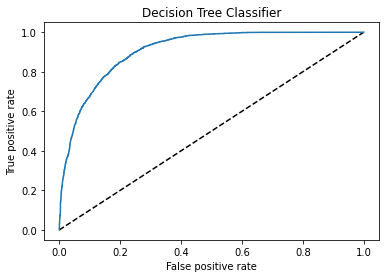

0.8237739766474668

In [160]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Exporting Model with joblib library

In [161]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

-Obs :  Exporting ML Model as .pkl file with joblib library